

# Project: Investigate a Dataset (TMDB movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Background**: When we talk about movies, we usually think about stars, huge wealth, and movies that are successful. However, behind its glamorous façade, the movie industry  is the scene of fierce competition! Every year hundreds of movies are filmed and released in the market, but only a small portion of them receive widely public attentions and high profit. How about the rest unsuccessful movies? What are these movies? Do you like to know more about the movie industry? Here is a good opportunity. The TMDB website shared a dataset of movies released from 1960 to 2015, which collects basic movie information and movie matrics of more than 5000 movies, including genres, popularity, vote average, budget and revenue. In this study, we will analyze the categorical and quantitative features of the movies from 1960 to 2015 and find their correlation to the succeed of movies.
>
> ***Questions***:
>
>***Part 1: Categorical analysis:***
>1. How many movies are released every year? Does the number increase every years?
> 2. Is there any particular genres that are liking the most?
>3. Does the taste and opinions of the audiences change over years?

>***Part 2: Quantitative analysis:***
>4. Do high budget movies receive high popularity?
>5. Do some genres make more profit?
>6. Are movies getting more successful in recent years?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Goals**: In this section of the report, we will load in the tmdb_movies data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# load TMDB data
df_raw = pd.read_csv('tmdb-movies.csv')
df_raw.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


We can see that these data are pretty neat, except the cast, keywords, genres and production_companies. They are strings format but contains multiple values and are separated by |. I will not separate and put them into different column right now, I will leave the issue on the later stage.

In [3]:
print(df_raw.shape)
print(df_raw.duplicated().sum())

(10866, 21)
1


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From above statistical table of the movie dataset, we notice that several column values are right skewed (media is lower than mean), except the vote average column is close to a normal distribution. We will plot these columns in histgraphs later on. Since the first quartile and media are all zero in budget and revenue, We assume that a lot of zero values exist in these two columns. 

In [6]:
print('There are {} zero values in budget_adj.'.format(df_raw.query('budget_adj==0').count()['id']))
print('There are {} zero values in revenue_adj.'.format(df_raw.query('revenue_adj==0').count()['id']))

There are 5696 zero values in budget_adj.
There are 6016 zero values in revenue_adj.


Since there are so many zero values in the budget_adj and revenue_adj columns, it is not a good idea to drop all of them. 

In [7]:
df_raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Since there are not too much missing data in 'cast', 'director', and 'genres', it is better to drop them when analyzing the data.

### Data Cleaning (Replace this with more specific notes!)
Just as I mentioned before, this dataset is very neat, we do not need to do too much clean up work. 
> First, we will drop several columns that are not related to our data analysis in the future.
> Secondly, we will save cleaned data to two dataframes:
> 1. df_new is for categorical analysis with lots of zero values in budget_adj and revenue_adj.
> 2. df_fin is for numerical analysis dealing with budget, revenue and so on.

In [8]:
#drop several columns that are not related to the future analysis and assign it to a new dataframe
df_new = df_raw.drop(['id','imdb_id','budget','revenue','homepage','tagline','overview'],axis=1)
df_new.head(2)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
# drop row contain null values of genres, cast, and director
print('df_new has {} columns and {} rows.'.format(df_new.shape[1],df_new.shape[0]))
df_new.dropna(subset=['genres','cast','director'],inplace=True)
print('After removing null values, df_new has {} columns and {} rows.'.format(df_new.shape[1],df_new.shape[0]))

df_new has 14 columns and 10866 rows.
After removing null values, df_new has 14 columns and 10732 rows.


In [10]:
# drop row contain null values of budget_adj and revenue_adj, and assign it to a new dataframe
df_fin = df_new[(df_new[['budget_adj','revenue_adj']]!=0).all(axis=1)]
print('After removing zero values, df_fin has {} columns and {} rows.'.format(df_fin.shape[1],df_fin.shape[0]))
#check zero value in budget_adj and revenue_adj
print('The number of zero value in budget_adj and revenue_adj:')
print((df_fin[['budget_adj','revenue_adj']]==0).sum())


After removing zero values, df_fin has 14 columns and 3850 rows.
The number of zero value in budget_adj and revenue_adj:
budget_adj     0
revenue_adj    0
dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis



### Part 1: Categorical analysis:

>1. How many movies are released every year? Does the number increase every years?
>2. Is there any particular genres that are liking the most?
>3. Does the taste and opinions of the audiences change over years?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BC3B7BBA8>,
      dtype=object)

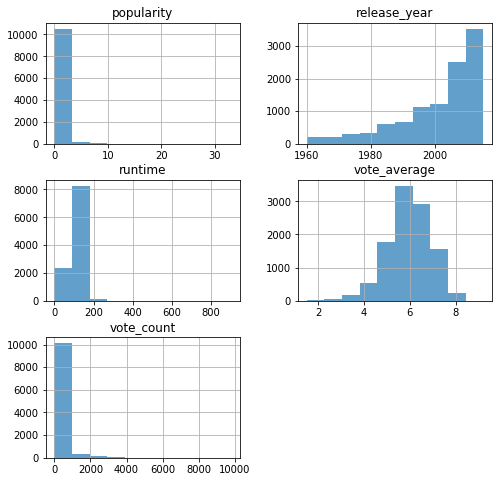

In [11]:
#let's take a quick glance at the histgraphs of the dataset
df_new.hist(['popularity','runtime','vote_count','vote_average','release_year'],figsize=(8,8),alpha =0.7)

From above histgraphs of the TMDB movies dataset, we could get a general idea of the recent movie market:
1. Most of the moives receive very low porpularity scores, which is consist with the reality: only small portion of the movies can succeed in the market.
2. The number of movies released every year has been increasing in recent years and this trend will continue in the future.
3. Most of the movies revieve 6 score of total 10 vote_average.

In [12]:
# let's clean the genres and director to make it easier to group 
columns = ['genres','director']

for c in columns:
    df_new[c]= df_new[c].apply(lambda x: x.split("|")[0])

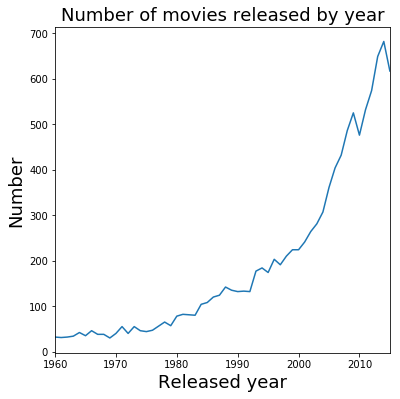

In [13]:
# let's plot the number of movies released every year
fig,ax=plt.subplots(figsize= (6,6))
df_new.groupby('release_year').count()['popularity'].plot(ax=ax,kind='line')

plt.xlabel('Released year',fontsize=18)
plt.ylabel('Number',fontsize=18)
plt.title('Number of movies released by year',fontsize=18)
plt.show()

First I explored the movie number trend over years, from 1960 to 2015. The trend of number of movies is upward year to year, while the trend of number growth has been steeper since 2000. In general, more movies are released in recent years.

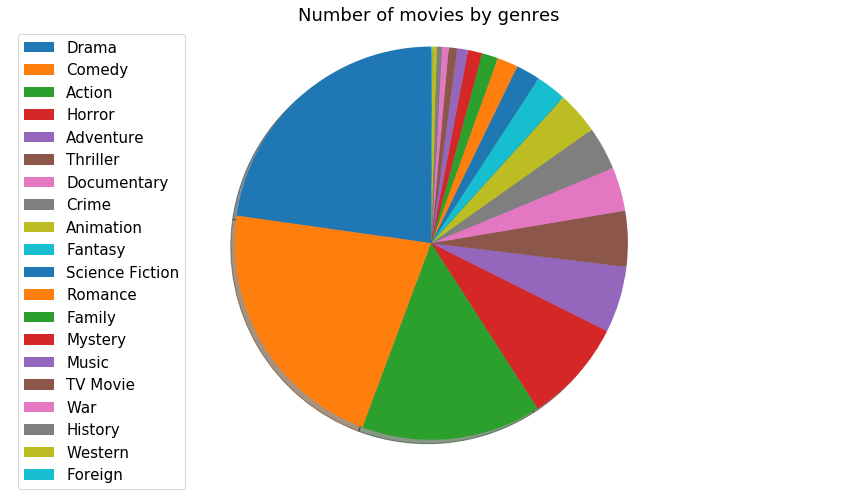

In [14]:
#plot the composition of movies' genres in the market
df_num_genres = df_new.genres.value_counts()
genres=df_new['genres'].value_counts().index
fig1,ax1=plt.subplots(figsize=(15,8))
ax1.pie(df_num_genres,shadow=True,startangle=90)
plt.legend(genres,loc="upper left",fontsize=15)
ax1.axis('equal')
plt.title('Number of movies by genres',fontsize=18)
plt.show()

From the pie chart, it is clearly shown that the genres ( Drama, Comedy, and Action) occupy nearly more than 50% share of the movie market.

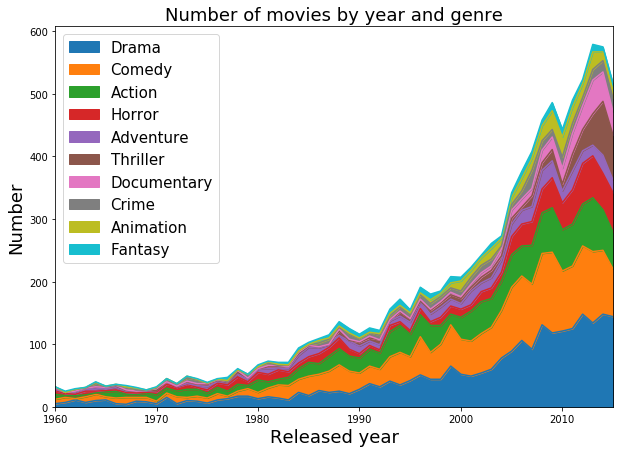

In [15]:
top=df_new['genres'].value_counts().head(10).index
fig,ax=plt.subplots(figsize= (10,7))
df_num_year=df_new.query('genres in @top').groupby(['release_year','genres']).count()['popularity'].unstack()
df_num_year[top].plot(ax=ax,kind='area',label='top')
plt.legend(loc="upper left",fontsize=15)
plt.xlabel('Released year',fontsize=18)
plt.ylabel('Number',fontsize=18)
plt.title('Number of movies by year and genre',fontsize=18)
plt.show()

If we plot the genre trends by year, we can find that the top three genres are still Drama, Comedy, and Action. Does this mean the top genres are more popular than the rest? 

There are 11 movies that has popularity scoure above 10.
There are 8976 movies that has popularity scoure below 1.


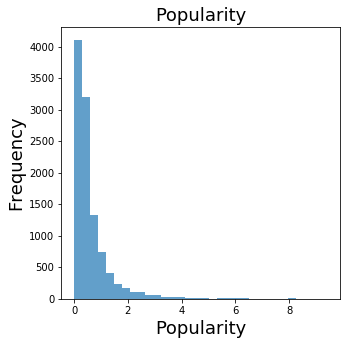

In [16]:
# let's plot the popularity in detail
popularity_below1 = df_new.query('popularity<1').count()['popularity']
popularity_above10 = df_new.query('popularity>=10').count()['popularity']
print('There are {} movies that has popularity scoure above 10.'.format(popularity_above10))
print('There are {} movies that has popularity scoure below 1.'.format(popularity_below1))

df_new.query('popularity<10')['popularity'].plot.hist(bins =32,figsize=(5,5),alpha=0.7)
plt.xlabel('Popularity',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Popularity',fontsize=18)
plt.show()

Only 11 movies receive popularity score equal or higher than 10, while nearly 80% of the movies receive less than 1 score. We are curious about the features related to these over 10 popularity score movies.

In [17]:
df_new.query('popularity>=10')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
629,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,Action,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
631,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo,washington d.c.|future|shield|marvel comic|comic,136,Action,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08
632,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski,hitman|revenge|murder|gangster|dog,101,Action,Thunder Road Pictures|Warner Bros.|87Eleven|De...,10/22/14,2712,7.0,2014,1.842182e+07,7.252661e+07
633,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,resistance|post-apocalyptic|dystopia|war|sequel,123,Science Fiction,Lionsgate|Color Force,11/18/14,3590,6.6,2014,1.151364e+08,6.927528e+08
634,10.174599,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,corruption|elves|dwarves|orcs|middle-earth (to...,144,Adventure,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...,12/10/14,3110,7.1,2014,2.302728e+08,8.797523e+08


The movies of popularity above 10 belong to three genres: action, adventure, and science fiction. Are these three genres more popular than the others?

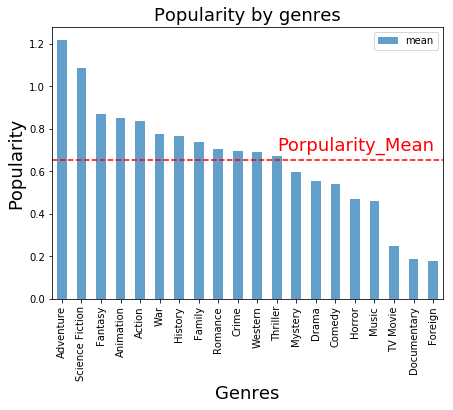

In [18]:
#let's plot a bar chart of the average popularity by genres
fig,ax=plt.subplots(figsize= (7,5))
df_new.groupby(['genres'])['popularity'].agg(['mean']).sort_values(by='mean',ascending=False).plot(ax=ax,kind='bar',alpha =0.7)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Popularity',fontsize=18)
plt.title('Popularity by genres',fontsize=18)

#let's plot a line of the average popularity of all movies
popularity_mean=df_new['popularity'].mean()
ax.axhline(popularity_mean, color='r',linestyle='dashed')
ax.annotate('Porpularity_Mean',xy=(11,0.7),color='r',fontsize=18)
plt.show()

If we plot the average popularity by genres, we can find that genres adventure and science fiction are more popular than the others. Does the popularity stay the same or change year by year?

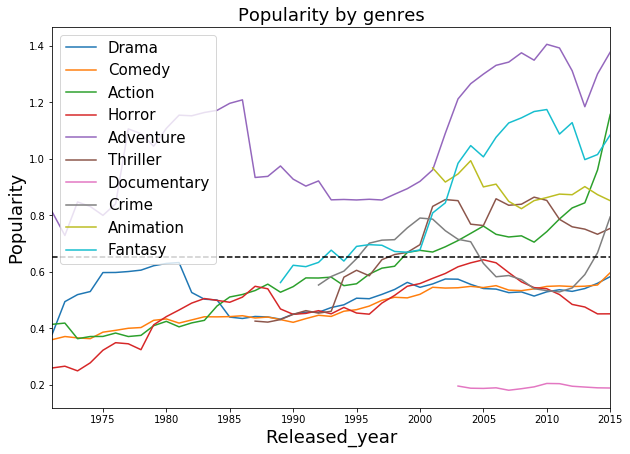

In [19]:
top=df_new['genres'].value_counts().head(10).index
fig,ax=plt.subplots(figsize= (10,7))
df_genres_popularity=df_new.query('genres in @top').groupby(['release_year','genres']).mean()['popularity'].unstack()
#df2.plot(ax=ax,kind='line')
popularity_mean=df_new['popularity'].mean()
df_genres_popularity[top].rolling(10).mean().query('release_year>1970').plot(ax=ax,kind='line',label='top')
ax.axhline(popularity_mean,color='black',linestyle='dashed')
plt.legend(loc="upper left",fontsize=15)
plt.xlabel('Released_year',fontsize=18)
plt.ylabel('Popularity',fontsize=18)
plt.title('Popularity by genres',fontsize=18)
plt.show()

When I explored the popularity trend by genres, I find that popularity are going up for most of the genres. The genre adventure always receives the highest popularity score and is above the average popularity. The genres action and fantasy become more popular in recent decade. 

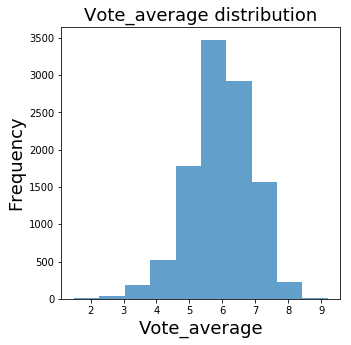

In [20]:
#let's plot the vote_average histgragh.
df_new.vote_average.plot.hist(figsize=(5,5),alpha=0.7)

plt.xlabel('Vote_average',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Vote_average distribution',fontsize=18)
plt.show()

The vote_average follows the normal distribution, which means majority of the movies receive averge rating. So it is hard to distinguish the most successful movies from ordinary ones base on vote_average feature.

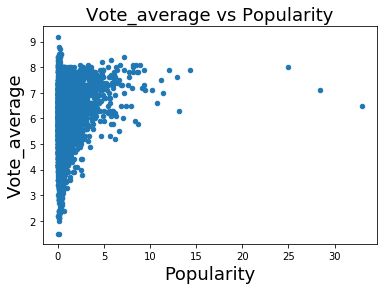

In [21]:
df_new.plot(kind='scatter', x='popularity',y='vote_average')
plt.xlabel('Popularity',fontsize=18)
plt.ylabel('Vote_average',fontsize=18)
plt.title('Vote_average vs Popularity',fontsize=18)
plt.show()

Popular movies (score higher than 5) receive higher vote_average, so vote_score is related to the popularity.

### ***In summary***
From the genres trend, the drama, comedy and action always have the higher number of releases. However, the adventure, drama and action are more popular in recent years. Combine these two trend, it seems like that more popular genres like drama and action are the favorite choices for the market.


### Part 2: Quantitative analysis:
>4. Do high budget movies receive high popularity?
>5. Do some genres make more profit?
>6. Are movies getting more successful in recent years?


In [22]:
df_fin.head(2)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [23]:
df_fin.shape

(3850, 14)

In [24]:
df_fin.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192778,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,1.475462,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463380,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,0.798343,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


This time we don't oberve any zero values in budget and revenue columns. But there is a 0.9 in the budget which we will try to resolve later on.

In [25]:
#remove vertival bar from director, genres
df_fin=df_fin.copy()

columns = ['genres','director']

for c in columns:
    df_fin.loc[:,c]= df_fin.loc[:,c].apply(lambda x: x.split("|")[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BC4086A58>,
      dtype=object)

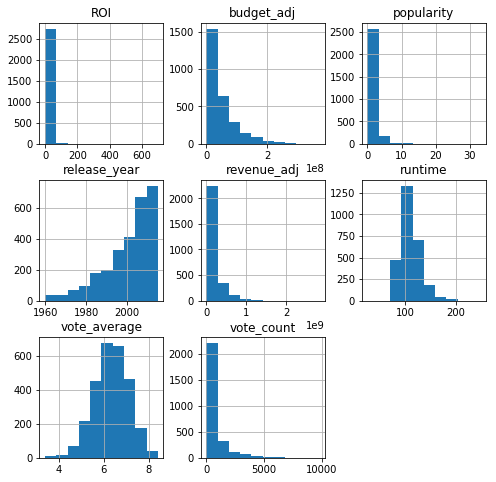

In [26]:
#let's calculate the return on investment

df_fin['ROI']=(df_fin['revenue_adj']-df_fin['budget_adj'])/df_fin['budget_adj']
df_fin=df_fin.query('(ROI<1000)&(ROI>0)').sort_values(by='ROI',ascending=False)
df_fin.hist(figsize=(8,8))

At the begining, we are worried that dropping too much zero values in budget and revenue could cause some bias in the data analysis. From above histgraphs, the df_fin data profile is very close to df_new ones.

1.Most of the moives receive very low porpularity scores, which is consist with the reality: only small portion of the movies can succeed in the market.

2.The number of movies released every year has been increasing in recent years and this trend will continue in the future.

3.Most of the movies revieve 6 score of total 10 vote_average.


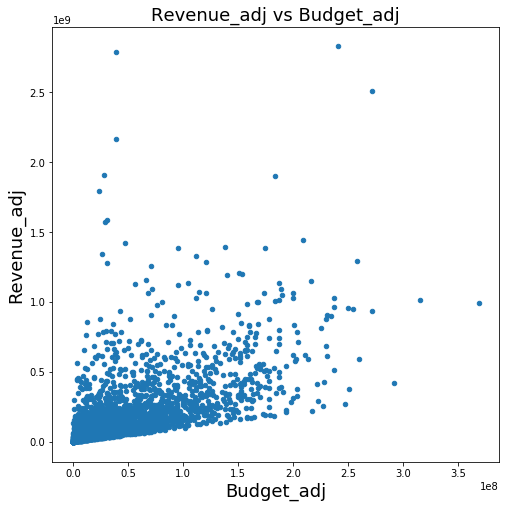

In [27]:
fig,ax=plt.subplots(figsize= (8,8))
df_fin.plot(ax=ax, x='budget_adj',y='revenue_adj',kind='scatter')
plt.xlabel('Budget_adj',fontsize=18)
plt.ylabel('Revenue_adj',fontsize=18)
plt.title('Revenue_adj vs Budget_adj',fontsize=18)
plt.show()

Revenue has a weak positive corelation with budget. But most of investors are more intested in how to make high revenue movies from low budget. So let's dig more information from the dataset.

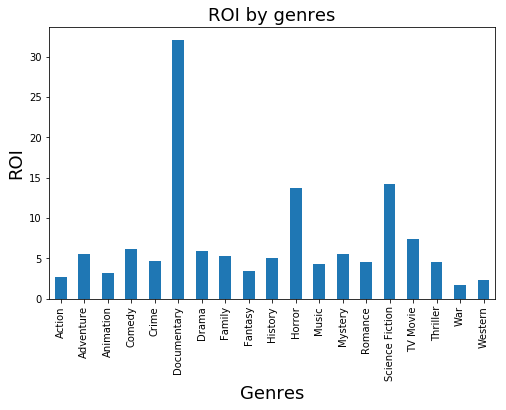

In [28]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.groupby('genres').mean()['ROI'].plot(kind='bar')
plt.xlabel('Genres',fontsize=18)
plt.ylabel('ROI',fontsize=18)
plt.title('ROI by genres',fontsize=18)
plt.show()

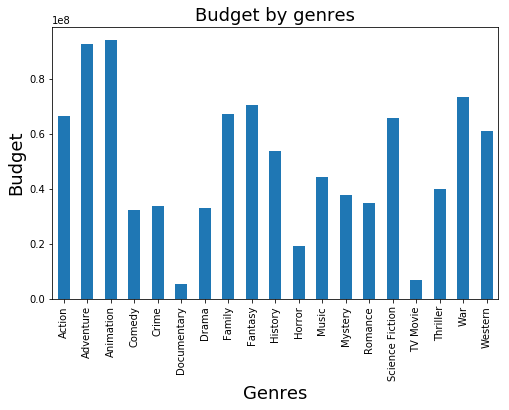

In [29]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.groupby('genres').mean()['budget_adj'].plot(kind='bar')
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Budget',fontsize=18)
plt.title('Budget by genres',fontsize=18)
plt.show()

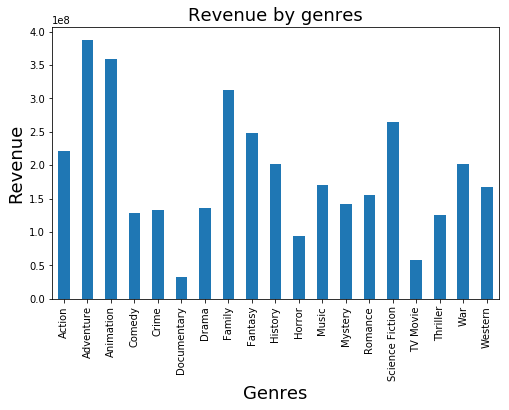

In [30]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.groupby('genres').mean()['revenue_adj'].plot(kind='bar')
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.title('Revenue by genres',fontsize=18)
plt.show()

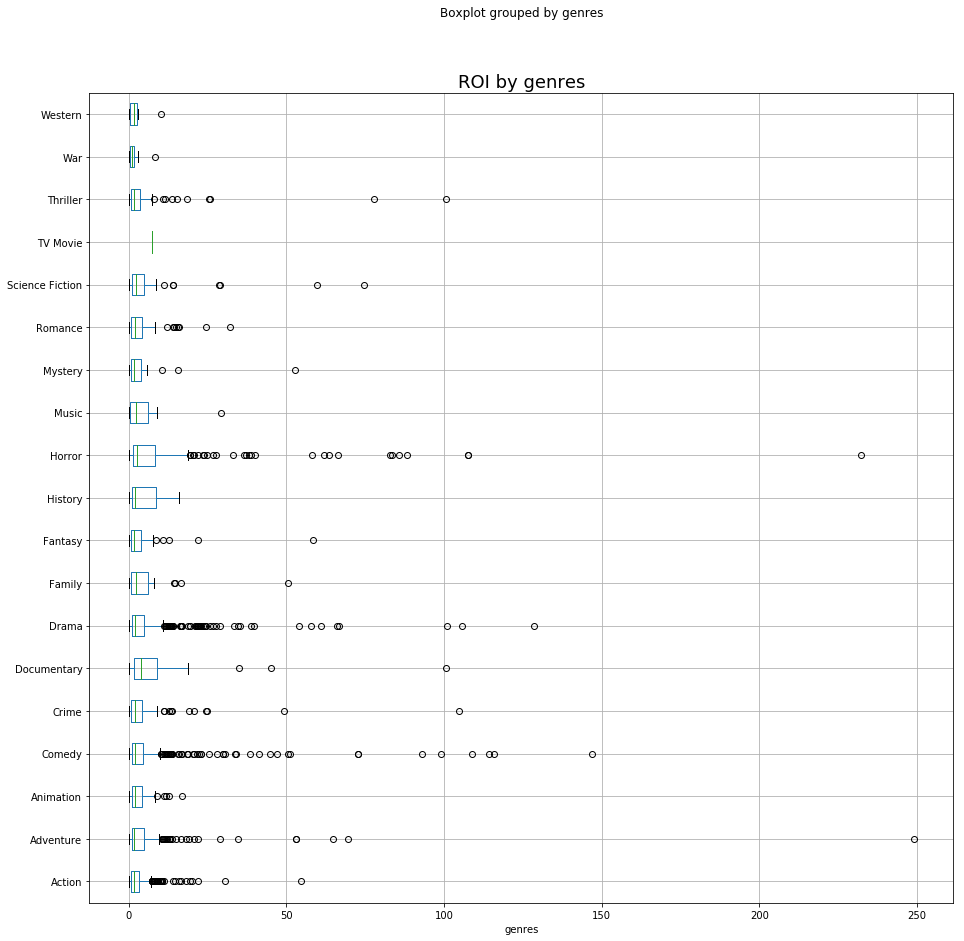

In [31]:
df_fin.query('ROI<300').boxplot(column='ROI',by='genres',vert=False,figsize=(15,15))
plt.title('ROI by genres',fontsize=18)
plt.show()

The genre documentary show the highest ROI, from the box chart it has less outlier due to the limit numbers of movies in the market. The more polular genres like drama, comedy, and adventure do show lots of outliers, and their IQR are close to the lower ROI region. 

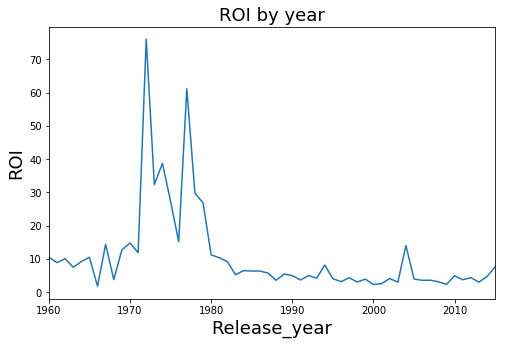

In [32]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.groupby('release_year').mean()['ROI'].plot(ax=ax,kind='line')

plt.xlabel('Release_year',fontsize=18)
plt.ylabel('ROI',fontsize=18)
plt.title('ROI by year',fontsize=18)
plt.show()

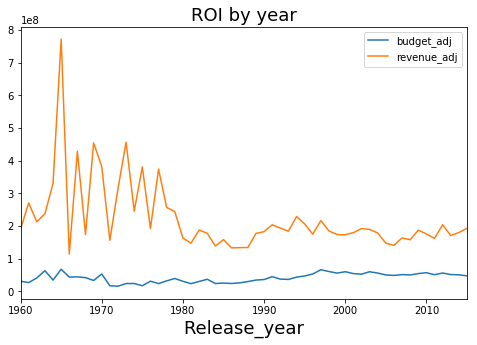

In [33]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.groupby('release_year')['budget_adj','revenue_adj'].mean().plot(ax=ax,kind='line')
plt.xlabel('Release_year',fontsize=18)
plt.title('ROI by year',fontsize=18)
plt.show()

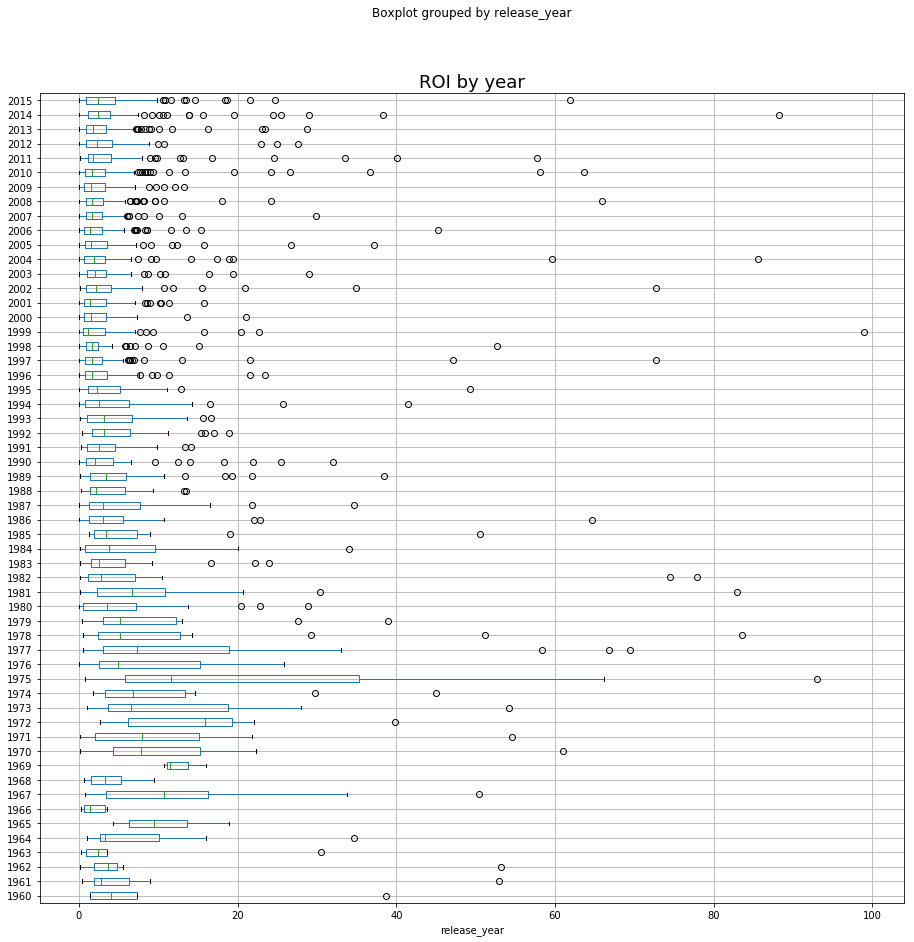

In [34]:
df_fin.query('(ROI<100)').boxplot(column='ROI',by='release_year',vert=False,figsize=(15,15))
plt.title('ROI by year',fontsize=18)
plt.show()

There was a blockbuster in ROI in 1970s which is shown in the line chart and box chart. It seems like that there are more chances to get a high ROI back to the early stage of movie industry. 

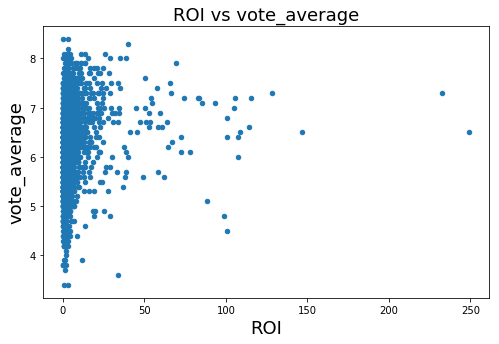

In [35]:
fig,ax=plt.subplots(figsize= (8,5))
df_fin.query('ROI<300').plot(ax=ax,x='ROI',y='vote_average',kind='scatter')
plt.xlabel('ROI',fontsize=18)
plt.ylabel('vote_average',fontsize=18)
plt.title('ROI vs vote_average',fontsize=18)
plt.show()

Generally, high voting rate movies tend to receive high ROI.

<a id='conclusions'></a>
## Conclusions

>***Part one: find the categorical features that are related to the popular movies***
>1. The number of movies is a going up and is in the accelerated growth trend.
>2. From the genres trend, the drama, comedy and action always have the higher number of releases. However, the adventure, drama and action are more popular in recent years. Combine this two trend, it seems like that more popular genres like drama and action are the favorite choice for the market.
>
>***Part two: find the commercial quantitative change of the movies by genres and years***
>1. The return on investment (ROI) shows a blockbuster in the 1970s, then average ROI is nearly the same year by year.
>2. The genre documentary has the highest ROI which is out of expectation because it is not popular from previous categorical analysis. One hypothesis is that there is not too much documentary in the market, so the competition is not as fierce as that in other genres. 
>
>***Limitation:***
In order to do a quantitative analysis, all the zero values in the budget and revenue columns are deleted, so the dataset with such large missing might not represent the real movie market and bring some strong bias in the analysis.

>***reference:***
>1. https://en.wikipedia.org/wiki/List_of_genres
>2. https://en.wikipedia.org/wiki/Return_on_investment
>3. https://en.wikipedia.org/wiki/History_of_film
